<a href="https://colab.research.google.com/github/lalakin99/Pandemic_Simulations_GraphTheory/blob/main/HW3_LalAkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - Network Dynamics and Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NDL_LABS/hw3

/content/drive/MyDrive/NDL_LABS/hw3


In [ ]:
import numpy as np
import scipy as sp
import networkx as nx
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import cvxpy as cp
import itertools
import scipy.io as sio
import random

## Exercise 1

Part 1.1.1

In [ ]:
#Drawing a k-regular symmetric undirected graph
num = 500
K = 4
G = nx.cycle_graph(num)

for n in range(num):
    G.add_edge(n, ((n + K//2) % num))
    G.add_edge(n, ((n - K//2) % num))

Problem 1.1

In [ ]:
#Parameters for the SIR dynamics
Beta = 0.3 #probability of infection
Rho = 0.7 #probability of recovery
T = 15 # Time is set for 15 weeks
N = 100 # Iteration number is 100

In [ ]:
new_inf = sp.sparse.lil_array((N, T))
s_count = sp.sparse.lil_array((N, T))
i_count = sp.sparse.lil_array((N, T))
r_count = sp.sparse.lil_array((N, T))

for epoch in range(N):
    #Initial configuration with 10 infected nodes selected at random
    in_conf = np.zeros(num, dtype=int)
    random_indices = np.random.choice(num, 10, replace=False)
    in_conf[random_indices] = 1
    prev_conf = in_conf

    for t in range(T):
        curr_conf = prev_conf.copy()
        new_inf_counter = 0

        for node in G.nodes():
            if prev_conf[node] == 0:
                m = np.sum(prev_conf[list(G.neighbors(node))] == 1)
                #Infection Probability
                prob_S_I = 1 - (1 - Beta) ** m
                curr_conf[node] = np.random.choice([0, 1], p=[1 - prob_S_I, prob_S_I])
                if curr_conf[node] == 1:
                    new_inf_counter += 1

            elif prev_conf[node] == 1:
                prob_I_R = Rho
                #Recovery Probability
                curr_conf[node] = np.random.choice([1, 2], p=[1 - prob_I_R, prob_I_R])

        new_inf[epoch, t] = new_inf_counter
        sir_count = collections.Counter(curr_conf)
        s_count[epoch, t] = sir_count[0]
        i_count[epoch, t] = sir_count[1]
        r_count[epoch, t] = sir_count[2]

        prev_conf = curr_conf

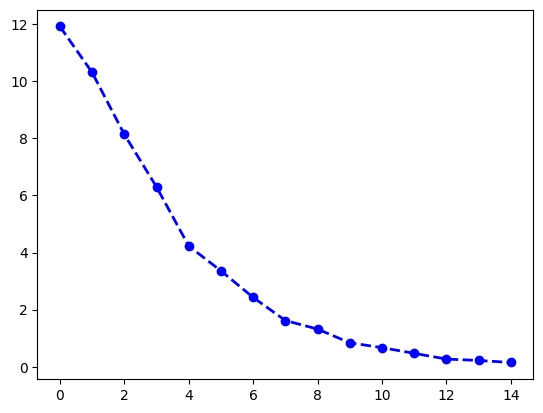

In [ ]:
new_inf_avg = new_inf.mean(axis=0)
plt.plot(new_inf_avg,color='blue', marker='o', linestyle='dashed',linewidth=2)

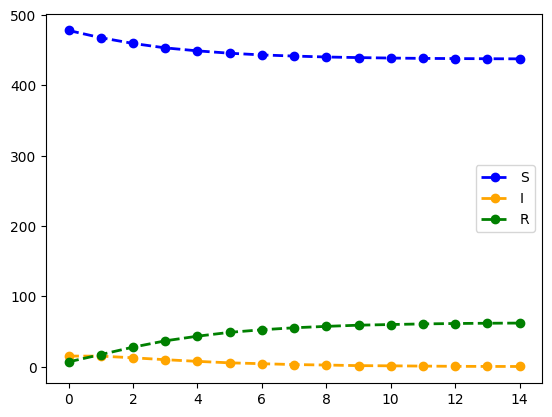

In [ ]:
s_avg = s_count.mean(axis=0)
i_avg = i_count.mean(axis=0)
r_avg = r_count.mean(axis=0)
plt.plot(s_avg, label='S',color='blue', marker='o', linestyle='dashed',linewidth=2)
plt.plot(i_avg, label='I',color='orange', marker='o', linestyle='dashed',linewidth=2)
plt.plot(r_avg, label='R',color='green', marker='o', linestyle='dashed',linewidth=2)
plt.legend()

Part 1.1.2

Problem 1.2

In [ ]:
#Parameters for the infection dynamics
Beta = 0.3 #probability of infection
Rho = 0.7 #probability of recovery
T = 15 # Time is set for 15 weeks
N = 100 # Iteration number is 100
num = 500 #amount of nodes in the graph
K = 6 #degree of Preferential A. M. Graph

In [ ]:
GPA = nx.complete_graph(K + 1)

a = 0

for node in range(K + 1, num):
    deg_PA = [d for n, d in GPA.degree()]
    deg_PA = np.array(deg_PA) + a
    deg_PA = deg_PA / sum(deg_PA)

    if K % 2 == 0:
        c = K // 2
    else:
        c = K // 2 + np.random.choice([0, 1])

    neighbors = np.random.choice(np.arange(len(GPA)), p=deg_PA, size=c, replace=False)
    GPA.add_node(node)
    for neighbor in neighbors:
        GPA.add_edge(node, neighbor)

In [ ]:
new_inf = sp.sparse.lil_array((N, T))
s_count = sp.sparse.lil_array((N, T))
i_count = sp.sparse.lil_array((N, T))
r_count = sp.sparse.lil_array((N, T))

for epoch in range(N):
    #Initial configuration with 10 infected nodes selected at random
    in_conf = np.zeros(num, dtype=int)
    random_indices = np.random.choice(num, 10, replace=False)
    in_conf[random_indices] = 1
    prev_conf = in_conf

    for t in range(T):
        curr_conf = prev_conf.copy()
        new_inf_counter = 0

        for node in G.nodes():
            if prev_conf[node] == 0:
                m = np.sum(prev_conf[list(G.neighbors(node))] == 1)
                #Infection Probability
                prob_S_I = 1 - (1 - Beta) ** m
                curr_conf[node] = np.random.choice([0, 1], p=[1 - prob_S_I, prob_S_I])
                if curr_conf[node] == 1:
                    new_inf_counter += 1

            elif prev_conf[node] == 1:
                prob_I_R = Rho
                #Recovery Probability
                curr_conf[node] = np.random.choice([1, 2], p=[1 - prob_I_R, prob_I_R])

        new_inf[epoch, t] = new_inf_counter
        sir_count = collections.Counter(curr_conf)
        s_count[epoch, t] = sir_count[0]
        i_count[epoch, t] = sir_count[1]
        r_count[epoch, t] = sir_count[2]

        prev_conf = curr_conf

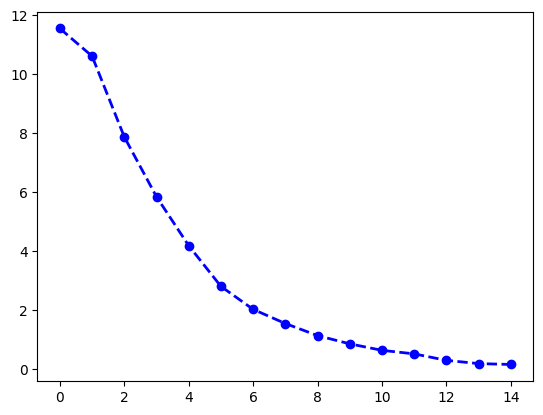

In [ ]:
new_inf_avg = new_inf.mean(axis=0)
plt.plot(new_inf_avg,color='blue', marker='o', linestyle='dashed',linewidth=2)

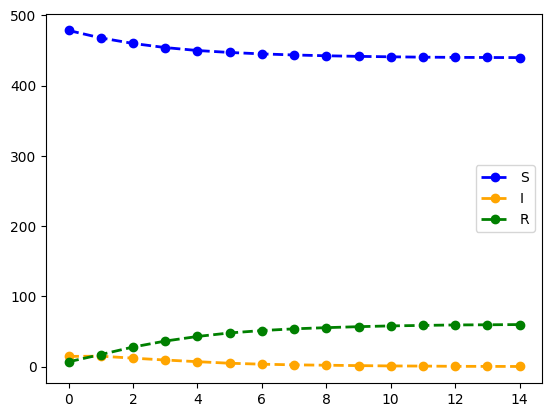

In [ ]:
s_avg = s_count.mean(axis=0)
i_avg = i_count.mean(axis=0)
r_avg = r_count.mean(axis=0)
plt.plot(s_avg, label='S',color='blue', marker='o', linestyle='dashed',linewidth=2)
plt.plot(i_avg, label='I',color='orange', marker='o', linestyle='dashed',linewidth=2)
plt.plot(r_avg, label='R',color='green', marker='o', linestyle='dashed',linewidth=2)
plt.legend()

Problem 1.3

In [ ]:
#Parameters for the model
num = 500
K = 6
Beta = 0.3
Rho = 0.7
T = 15
N = 100

In [ ]:
GPA = nx.complete_graph(K + 1)
a = 0

for node in range(K + 1, num):
    deg_PA = [d for n, d in GPA.degree()]
    deg_PA = np.array(deg_PA) + a
    deg_PA = deg_PA / sum(deg_PA)

    if K % 2 == 0:
        c = K // 2
    else:
        c = K // 2 + np.random.choice([0, 1])

    neighbors = np.random.choice(np.arange(len(GPA)), p=deg_PA, size=c, replace=False)
    GPA.add_node(node)
    for neigh in neighbors:
        GPA.add_edge(node, neigh)

In [ ]:
vaccination_scheme = np.array([0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]) / 100

In [ ]:
new_vacc_count = np.diff(vaccination_scheme, append=vaccination_scheme[-1]) * num
new_vacc_count

array([25., 50., 50., 50., 50., 50., 25.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [ ]:
new_inf = sp.sparse.lil_array((N, T))
s_count = sp.sparse.lil_array((N, T))
i_count = sp.sparse.lil_array((N, T))
r_count = sp.sparse.lil_array((N, T))

for epoch in range(N):
    # initial configuration with 10 infected nodes selected at random
    in_conf = np.zeros(num, dtype=int)
    random_indices = np.random.choice(num, 10, replace=False)
    in_conf[random_indices] = 1
    prev_conf = in_conf

    unvaccinated_indices = np.arange(num)

    for t in range(T):
        curr_conf = prev_conf.copy()
        new_inf_count = 0

        # vaccination
        new_vacc_indices = np.random.choice(unvaccinated_indices, round(new_vacc_count[t]), replace=False)
        unvaccinated_indices = np.array([person for person in unvaccinated_indices
                                        if person not in new_vacc_indices])

        for node in GPA.nodes:
            # S and not vaccinated
            if prev_conf[node] == 0 and node in unvaccinated_indices:
                m = 0
                for neigh in GPA.neighbors(node):
                    # I and not vaccinated
                    if prev_conf[neigh] == 1 and neigh in unvaccinated_indices:
                        m += 1

                prob_S_I = 1 - (1 - Beta) ** m
                curr_conf[node] = np.random.choice([0, 1], p=[1 - prob_S_I, prob_S_I])
                if curr_conf[node] == 1:
                    new_inf_count += 1

            # I
            elif prev_conf[node] == 1:
                prob_I_R = Rho
                curr_conf[node] = np.random.choice([1, 2], p=[1 - prob_I_R, prob_I_R])

        new_inf[epoch, t] = new_inf_count
        sir_count = collections.Counter(curr_conf)
        s_count[epoch, t] = sir_count[0]
        i_count[epoch, t] = sir_count[1]
        r_count[epoch, t] = sir_count[2]

        prev_conf = curr_conf

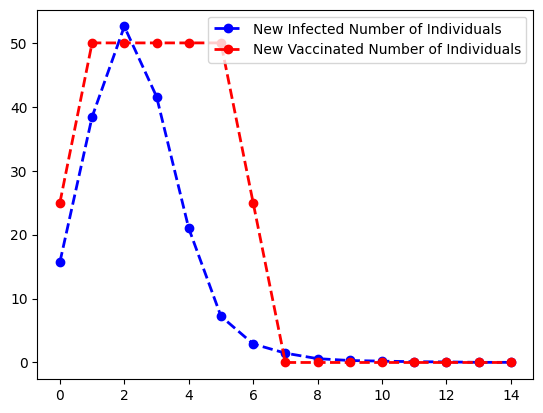

In [ ]:
new_inf_avg = new_inf.mean(axis=0)
plt.plot(new_inf_avg, label='New Infected Number of Individuals',color='blue', marker='o', linestyle='dashed',linewidth=2)
plt.plot(new_vacc_count, label='New Vaccinated Number of Individuals',color='red', marker='o', linestyle='dashed',linewidth=2)
plt.legend()

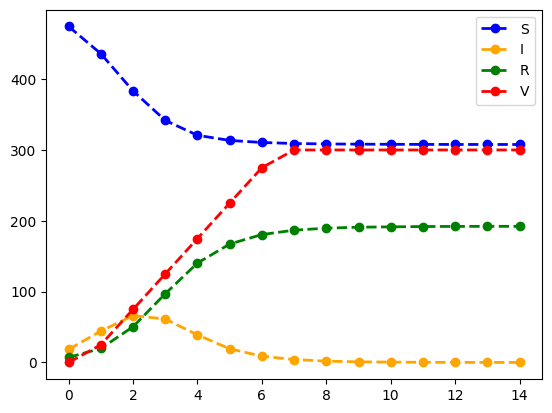

In [ ]:
s_avg = s_count.mean(axis=0)
i_avg = i_count.mean(axis=0)
r_avg = r_count.mean(axis=0)
plt.plot(s_avg, label='S',color='blue', marker='o', linestyle='dashed',linewidth=2)
plt.plot(i_avg, label='I',color='orange', marker='o', linestyle='dashed',linewidth=2)
plt.plot(r_avg, label='R',color='green', marker='o', linestyle='dashed',linewidth=2)
plt.plot(vaccination_scheme * num, label='V',color='red', marker='o', linestyle='dashed',linewidth=2)
plt.legend()

Problem 1.4

In [ ]:
num = 934
k0, d_k = 10, 1
beta0, d_beta = 0.3, 0.1
rho0, d_rho = 0.6, 0.1
T = 15
N = 10
K = 934

In [ ]:
vaccination_scheme = np.array([5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]) / 100

new_vacc_count = np.diff(vaccination_scheme, append=vaccination_scheme[-1]) * num

new_vacc_count = np.around(new_vacc_count)

new_infect_real = np.array([1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0])

In [ ]:
def RMSE(simulation, real = new_infect_real):
  error = (simulation[:T] - real[:T]) ** 2
  sum_err = np.sum(error)
  return np.sqrt(sum_err / T)

In [ ]:
def SIRVsimulation(K, beta, rho):
 #Preferential attachment model
  GPA = nx.complete_graph(K + 1)
  for node in range(K + 1, num):
    deg_PA = [d for n, d in GPA.degree()]
    deg_PA = np.array(deg_PA)
    deg_PA = deg_PA / sum(deg_PA)
    if K % 2 == 0:
      c = K // 2
    else:
      c = K // 2 + np.random.choice([0, 1])

    neighbors = np.random.choice(np.arange(len(GPA)), p=deg_PA, size=c, replace=False)
    GPA.add_node(node)
    for neigh in neighbors:
      GPA.add_edge(node, neigh)

  # SIRV simulation
  new_inf = sp.sparse.lil_array((N, T))
  s_count = sp.sparse.lil_array((N, T))
  i_count = sp.sparse.lil_array((N, T))
  r_count = sp.sparse.lil_array((N, T))

  for epoch in range(N):
    # initial configuration with 10 infected nodes selected at random
    in_conf = np.zeros(num, dtype=int)
    random_indices = np.random.choice(num, 10, replace=False)
    in_conf[random_indices] = 1
    prev_conf = in_conf
    unvaccinated_indices = np.arange(num)

    for t in range(T):
      curr_conf = prev_conf.copy()
      new_infect_count = 0

      newly_vacc_indices = np.random.choice(unvaccinated_indices, round(new_vacc_count[t]), replace=False)
      unvaccinated_indices = np.array([person for person in unvaccinated_indices
                                      if person not in newly_vacc_indices])

      for node in GPA.nodes:
        if prev_conf[node] == 0 and node in unvaccinated_indices:
          m = 0
          for neigh in GPA.neighbors(node):
            # I and not vaccinated
            if prev_conf[neigh] == 1 and neigh in unvaccinated_indices:
              m += 1

          prob_S_I = 1 - (1 - beta) ** m
          curr_conf[node] = np.random.choice([0, 1], p=[1 - prob_S_I, prob_S_I])
          if curr_conf[node] == 1:
            new_infect_count += 1


        # I
        elif prev_conf[node] == 1:
          prob_I_R = rho
          curr_conf[node] = np.random.choice([1, 2], p=[1 - prob_I_R, prob_I_R])


      new_inf[epoch, t] = new_infect_count
      sir_count = collections.Counter(curr_conf)
      s_count[epoch, t] = sir_count[0]
      i_count[epoch, t] = sir_count[1]
      r_count[epoch, t] = sir_count[2]

      prev_config = curr_conf

  new_infect_avg = new_inf.mean(axis=0)
  s_avg = s_count.mean(axis=0)
  i_avg = i_count.mean(axis=0)
  r_avg = r_count.mean(axis=0)

  return RMSE(new_infect_avg), new_infect_avg, s_avg, i_avg, r_avg

In [ ]:
min_err = 10e5

while True:
  print('New Epoch')
  print('k0 beta0 rho0:', [k0, beta0, rho0])
  print()

  k_low = kmax(0 - d_k, 0)
  k_high = min(k0 + d_k, num)
  k_values = [k_low, k0, k_high]

  beta_low = max(beta0 - d_beta, 0)
  beta_high = min(beta0 + d_beta, 1)
  beta_values = [beta_low, beta0, beta_high]

  rho_low = max(rho0 - d_rho, 0)
  rho_high = min(rho0 + d_rho, 1)
  rho_values = [rho_low, rho0, rho_high]

  grid_search = itertools.product(k_values, beta_values, rho_values)
  new_infect_sim = np.zeros(T)
  s_sim = np.zeros(T)
  i_sim = np.zeros(T)
  r_sim = np.zeros(T)
  params = (k0, beta0, rho0)
  prev_params = params

  for k, beta, rho in grid_search:
    err, new_infect_avg, s_avg, i_avg, r_avg = SIRVsimulation(k, beta, rho)

    print('Params:', [k, beta, rho])
    print('Err:', err)
    print('current:', [new_infect_sim, s_sim, i_sim, r_sim,])
    print()

    if err < min_err:
      min_err = err
      new_infect_sim, s_sim, i_sim, r_sim = new_infect_avg, s_avg, i_avg, r_avg
      paramet = (k, beta, rho)

  print('BEST Params:', paramet)
  print('BEST Err:', min_err)
  print()

  if paramet == prev_params:
    break
  else:
    k0, beta0, rho0 = paramet

New Epoch
k0 beta0 rho0: [10, 0.3, 0.6]

Params: [9, 0.19999999999999998, 0.5]
Err: 12.346929442847994
current: [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

Params: [9, 0.19999999999999998, 0.6]
Err: 12.140428328522843
current: [array([15.1, 12.8, 10.6,  8.8,  7.1,  5.1,  5.2,  4.4,  3.1,  4.2,  4.5,
        3.5,  3.8,  3.8,  4. ]), array([908.9, 911.2, 913.4, 915.2, 916.9, 918.9, 918.8, 919.6, 920.9,
       919.8, 919.5, 920.5, 920.2, 920.2, 920. ]), array([20.3, 18.6, 15.8, 13.9, 11.6, 10. ,  9.8,  8.7,  8.1,  9.5,  9.1,
        8.7,  8.5,  7.9,  9.1]), array([4.8, 4.2, 4.8, 4.9, 5.5, 5.1, 5.4, 5.7, 5. , 4.7, 5.4, 4.8, 5.3,
       5.9, 4.9])]

Params: [9, 0.19999999999999998, 0.7]
Err: 12.738210235350962
current: [array([15.8, 12.8,  9.2,  8.4,  7.6,  5.3

In [ ]:
new_infect_sim

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
plt.plot(new_infect_sim, label='Simulation newly infected',color='orange', marker='o', linestyle='dashed',linewidth=2)
plt.plot(new_infect_real, label='Real Case newly infected',color='blue', marker='o', linestyle='dashed',linewidth=2)

plt.legend()

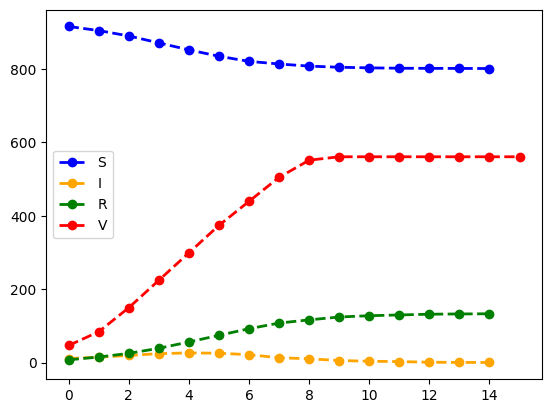

In [ ]:
plt.plot(s_sim, label='S',color='blue', marker='o', linestyle='dashed',linewidth=2)
plt.plot(i_sim, label='I',color='orange', marker='o', linestyle='dashed',linewidth=2)
plt.plot(r_sim, label='R',color='green', marker='o', linestyle='dashed',linewidth=2)
plt.plot(vaccination_scheme * num, label='V',color='red', marker='o', linestyle='dashed',linewidth=2)
plt.legend()

## Exercise 2

Problem 2.1

In [ ]:
#to normalize the probabilities i first tried normalizing them
#but the results werent converging so i tried the softmax function

def formula(w):
    e = np.exp(w)
    if np.sum(e) == 0:
        return [1/len(w) for i in w]
    return e/np.sum(e)

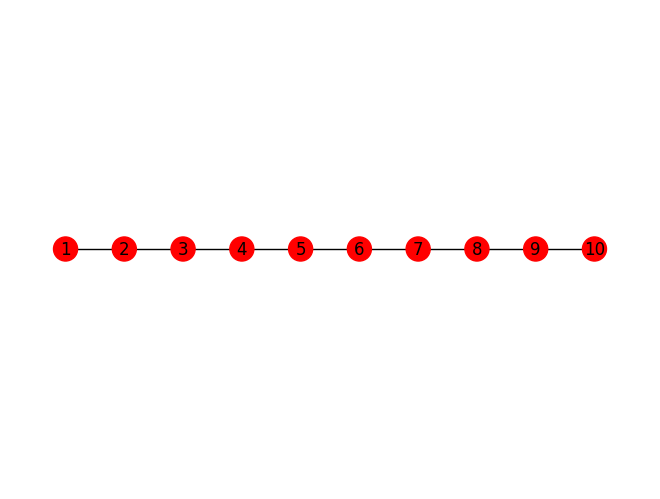

In [ ]:
G = nx.Graph()
G.add_nodes_from(range(1, 11))
#Drawing a line raph
for i in range(9):
    G.add_edge(i + 1, i + 2)

#Defining two states
states = ('red', 'green')


#Initializing all nodes as in state red
for node in G.nodes():
    G.nodes[node]['state'] = 'red'

nx.draw(G, with_labels=True, pos={n: [n, 0] for n in list(G.nodes)}, node_color=list(nx.get_node_attributes(G, 'state').values()))

In [ ]:
#Potential function as given in the hw specifications
def potential(G):
    r = 0
    list(nx.get_node_attributes(G, 'state').values())
    W = nx.adjacency_matrix(G).toarray()
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            r += W[i][j] * int(G.nodes[i + 1]['state'] == G.nodes[j + 1]['state'])

    return r / 2

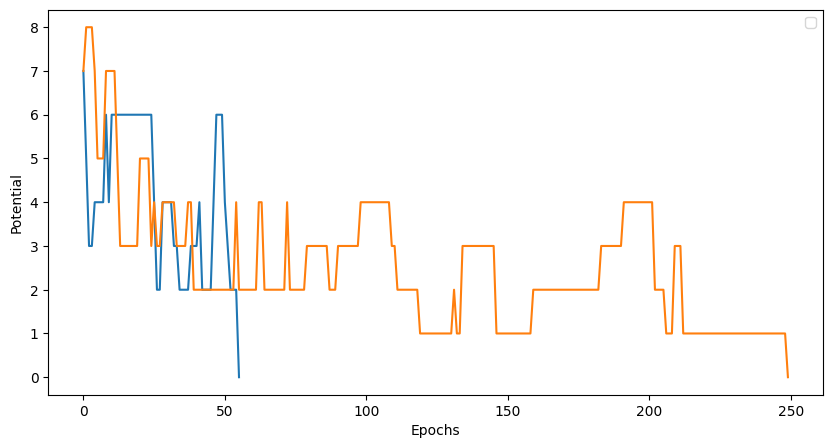

In [ ]:
W = nx.adjacency_matrix(G).toarray()
#Implementing two epochs to see the effect of randomicity
for iterations in range(2):
    potentials = []
    #All nodes are initialized as red
    for node in G.nodes():
        G.nodes[node]['state'] = 'red'
    t = 0

    while True:
        #Randomly choosing a new state for the node
        node_next = np.random.choice(list(G.nodes))
        probs = []
        for state in states:
          #Probability of each new move by counting how many nodes are in each state
            probs.append(np.sum([x == state for x in list(nx.get_node_attributes(G, 'state').values())] * W[node_next - 1]))

        probs = [-x * t / 100 for x in probs]
        probs = formula(probs)
        #Choosing a new state randomly according to the probabilities
        new_state = np.random.choice(states, p=probs)
        G.nodes[node_next]['state'] = new_state
        potentials.append(potential(G))
        #Stopping criteria is potential equal to 0
        if potential(G) == 0:
            break

        t += 1

    plt.plot(range(len(potentials)), potentials)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Potential')
plt.show()

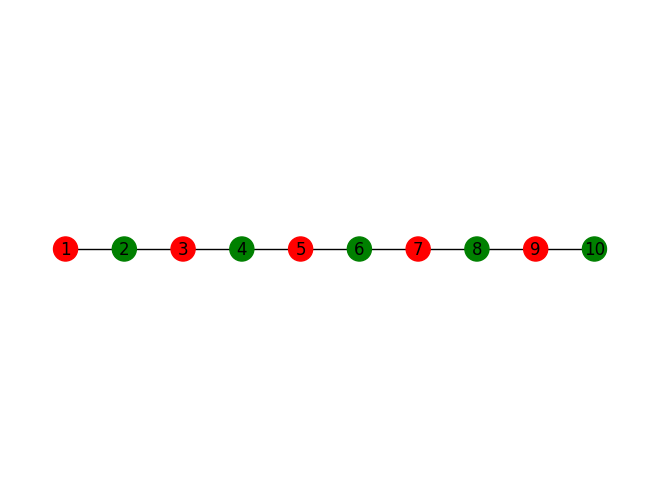

In [ ]:
nx.draw(G, with_labels=True,pos={n:[n,0] for n in list(G.nodes)}, node_color=list(nx.get_node_attributes(G,'state').values()))

Problem 2.2

In [ ]:
wifi = sp.io.loadmat('wifi.mat')

In [ ]:
wifi

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan  3 10:16:43 2024',
 '__version__': '1.0',
 '__globals__': [],
 'wifi': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [ ]:
W = wifi["wifi"]
print(W)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
coords = sp.io.loadmat('coords.mat')

In [ ]:
C = coords["coords"]

In [ ]:
#Drawing G with W as the adjacency matrix
G = nx.from_numpy_array(W, create_using=nx.Graph)

#Coords is matched with each router (node) in G
for i, n in enumerate(G.nodes):
    G.nodes[n]['coord'] = list(C[i])

#8 possible states defined
states = list(range(1,9))
states_names = ['red','green','blue','yellow','magenta','cyan','white','black']

for node in G.nodes():
    G.nodes[node]['state'] = np.random.choice(states)

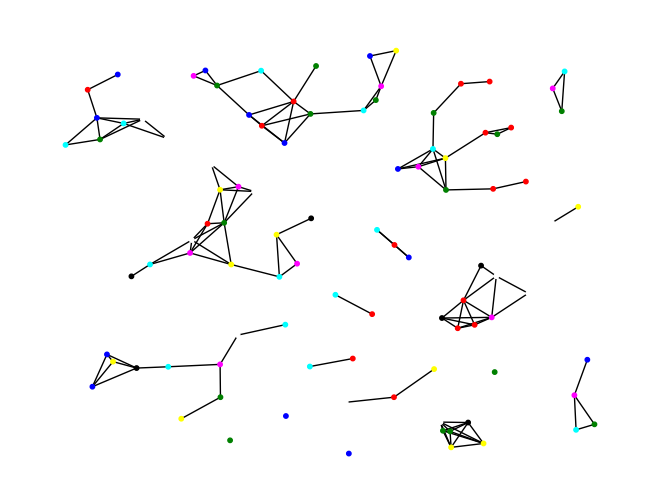

In [ ]:
nx.draw(G, pos=nx.get_node_attributes(G,'coord'), with_labels=False,
        node_color=[states_names[i-1] for i in list(nx.get_node_attributes(G,'state').values())], node_size=10, node_shape='o')
plotwifi=plt.gca()

In [ ]:
#Cost function as given in the specifications

def cost(ind,neigh):
    if ind == neigh:
        return 2
    elif abs(ind-neigh) == 1:
        return 1
    else:
        return 0

In [ ]:
#Potential function as given in the specifications

def potential(G):
    r = 0
    list(nx.get_node_attributes(G,'state').values())
    W = nx.adjacency_matrix(G).toarray()
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            r += W[i][j]*cost(G.nodes[i]['state'],G.nodes[j]['state'])

    return r/2

Text(0, 0.5, 'Potentials')

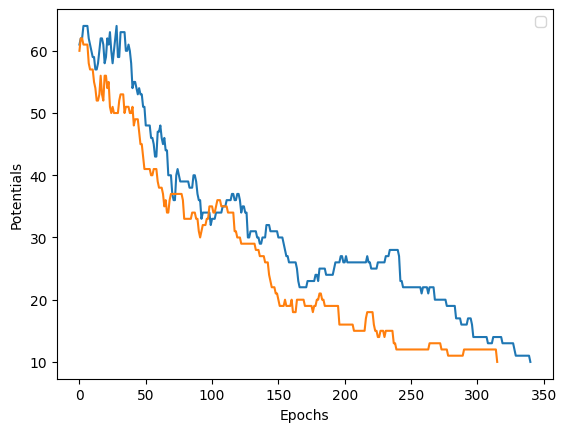

In [ ]:
W = nx.adjacency_matrix(G).toarray()

for iteration in range(2):
    potentials = []

    for node in G.nodes():
        G.nodes[node]['state'] = np.random.choice(states)

    t = 0

    while True:
        next_node = np.random.choice(list(G.nodes))
        probs = []

        for state in states:
            probs.append(np.sum([cost(x,state) for x in list(nx.get_node_attributes(G,'state').values())]*W[next_node]))

        probs = [-x*t/100 for x in probs]
        probs = formula(probs)
        new_state = np.random.choice(states,p=probs)
        G.nodes[next_node]['state'] = new_state
        potentials.append(potential(G))
        #Stopping criteria is if the potential is near 0
        if np.isclose(potential(G),0,atol=10):
            break

        t += 1
    plt.plot(range(len(potentials)),potentials)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Potentials')

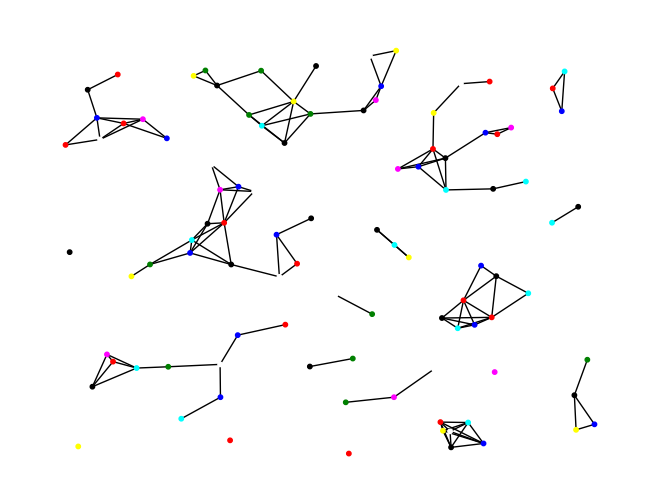

In [ ]:
nx.draw(G, pos=nx.get_node_attributes(G,'coord'), with_labels=False,
        node_color=[states_names[i-1] for i in list(nx.get_node_attributes(G,'state').values())], node_size=10, node_shape='o')
plotfinal=plt.gca()